In [115]:
import mne

In [254]:
import pandas as pd

In [255]:
import json

In [256]:
# %matplotlib inline
import matplotlib.pyplot as plt

In [257]:
import numpy as np

In [258]:
import matplotlib

In [259]:
%load_ext autoreload

%autoreload 2
import tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
ch_names = ["Fp1", "Fp2", "C3", "C4", "P7", "P8", 'O1', 'O2']

In [261]:
sampling_freq = 256
n_channels = len(ch_names)
ch_types = ["eeg"] * n_channels

In [262]:
baseline_name = f"/home/anatoli/Документы/skywind/eeg-playground/sasha-data/eeg/sasha-baseline.txt"

In [263]:
baseline_raw = tools.read_signal(
    baseline_name, 
    ch_names=ch_names, 
    ch_types=ch_types, 
    sampling_freq=sampling_freq
)

/home/anatoli/Документы/skywind/eeg-playground/tools.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sep=", ", skiprows=6, names=["#"] + ch_names + ["x", "y", "z", "time", "timestamp"]


Creating RawArray with float64 data, n_channels=8, n_times=23882
    Range : 0 ... 23881 =      0.000 ...    93.285 secs
Ready.
Setting up band-stop filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 47.75 Hz)
- Upper passband edge: 52.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 52.25 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lowe

In [264]:
baseline_raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, P7, P8, O1, O2
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>

In [265]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [353]:
tools.plot_frequencies(baseline_raw, frequencies=(5, 50), start=0, duration=20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 sec)



# Фильтрация

In [354]:
# time_stats = (75, 30)
time_stats = (14, 86)

In [381]:
ica = mne.preprocessing.ICA()

In [382]:
raw_part = baseline_raw.copy().pick(["Fp1", "Fp2", "O1", "O2"]).crop(tmin=time_stats[0], tmax=time_stats[1])

In [386]:
tools.plot_frequencies(raw_part, frequencies=(5, 50), start=0, duration=20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 sec)



In [387]:
ica.fit(raw_part.copy())

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting all PCA components: 4 components
Fitting ICA took 0.2s.


<ICA | raw data decomposition, fit (fastica): 18433 samples, 4 components, channels used: "eeg">

In [388]:
ica_eeg = ica.get_sources(raw_part)

In [389]:
_ = mne.viz.plot_raw(
    ica_eeg,
    duration=30, 
    start=0, 
    scalings=5,
    show=True
)

In [390]:
transformed_raw = ica.apply(raw_part.copy(), exclude=[1])

Transforming to ICA space (4 components)
Zeroing out 1 ICA component


In [391]:
tools.plot_frequencies(transformed_raw, frequencies=(5, 50), start=0, duration=20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 sec)



# Извлечение амплитуды

In [522]:
raw_alpha = tools.get_alpha_amplitude(transformed_raw, sampling_freq=sampling_freq, channels=["O1", "O2"])#.crop(tmin=time_stats[0], tmax=time_stats[1])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 sec)

Creating RawArray with float64 data, n_channels=5, n_times=18433
    Range : 0 ... 18432 =      0.000 ...    72.000 secs
Ready.


In [524]:
_ = mne.viz.plot_raw(
    raw_alpha,
    events_detected,
    duration=100, 
    start=0, 
    scalings={'eeg': 50, 'misc': 3},
    show=True
)

In [539]:
events_detected = mne.find_events(raw_alpha, initial_event=False)

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
7 events found
Event IDs: [1 2]


In [543]:
epochs = mne.Epochs(
    raw_alpha, 
    events_detected,
    event_id={'open': 1, 'close': 2},
    picks=["amplitude"],
    baseline=None,
    tmin=0,
    tmax=5,
    preload=True, 
    reject_by_annotation=False
).pick(["amplitude"])

Not setting metadata
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Loading data for 7 events and 1281 original time points ...
1 bad epochs dropped


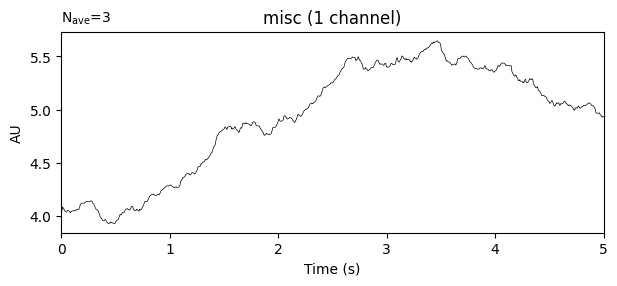

In [544]:
epochs["open"].average(picks=["amplitude"]).plot()

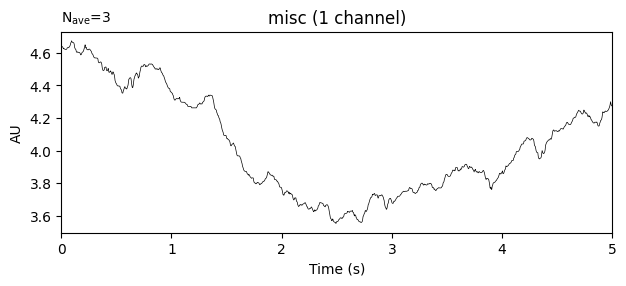

In [545]:
epochs["close"].average(picks=["amplitude"]).plot()